# Import Libraries

In [1]:
#Libraries are imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Path is created
path = r'C:\Users\Ida\Desktop\Fashion Project\Data Source'

In [4]:
# File is imported
df=pd.read_csv(os.path.join(path,'mock_fashion_data_uk_us.csv'))

In [5]:
df.head()

,Unnamed: 0,Product Name,Price,Brand,Category,Rating,Review Count,Style Attributes,Total Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,0,T5D3,97.509966,Ralph Lauren,Footwear,1.421706,492,Streetwear,"M, L, XL",Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,1,Y0V7,52.341277,Ted Baker,Tops,1.037677,57,Vintage,"M, L, XL",Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,2,N9Q4,15.430975,Jigsaw,Footwear,3.967106,197,Streetwear,"S, M, L",Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,3,V2T6,81.116542,Alexander McQueen,Outerwear,2.844659,473,Formal,"S, M, L",Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,1.183242,55,Sporty,"M, L, XL",Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


# Convert to Numeric 

In [6]:
#Column is turned to numerical 
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [7]:
#Column is turned to numerical 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [8]:
#Column is turned to numerical 
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')

In [9]:
#Column is turned to numerical 
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

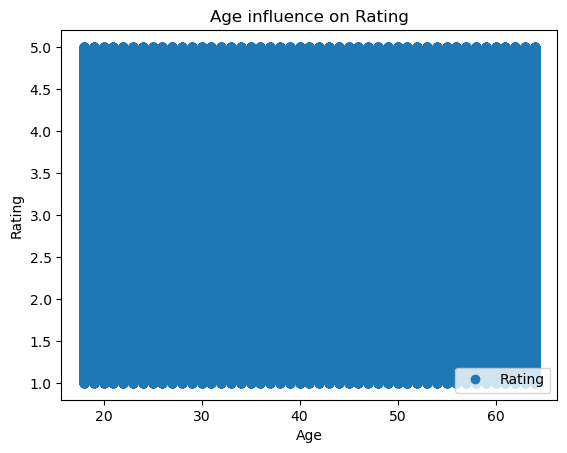

In [10]:
# Scatter plot is created
df.plot(x = 'Age', y= 'Rating' ,style='o') 
plt.title('Age influence on Rating')  
plt.xlabel('Age')  
plt.ylabel('Rating')  
plt.show()

In [47]:
# Sample set is created
sample = df.sample(n=5000)
sample.head()

,Unnamed: 0,Product Name,Price,Brand,Category,Rating,Review Count,Style Attributes,Total Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
627333,627333,J4Q9,45.946428,Ted Baker,Tops,4.812998,166,Sporty,"S, M, L",Black,Low,33,Grazia,Song of Style,Fall,Evening,Negative,Neutral,Positive
478704,478704,K1Y2,31.672733,Tommy Hilfiger,Jewelry,1.674927,370,Edgy,"M, L, XL",Green,Above Average,38,Marie Claire,Negin Mirsalehi,Spring/Summer,Nighttime,Neutral,Neutral,Neutral
688505,688505,E6Q1,54.026128,Burberry,Bottoms,1.980373,131,Sporty,"S, L, XL",Green,Significant,29,W,Julie Sariñana,Winter,Weekend,Unknown,Negative,Neutral
970318,970318,C7V8,61.010519,Jigsaw,Lingerie,3.989264,10,Edgy,"S, L, XL",Blue,Low,27,Grazia,Song of Style,Fall,Evening,Neutral,Mixed,Mixed
226320,226320,D2A1,25.599209,Calvin Klein,Outerwear,4.568537,376,Preppy,"S, M, L",Green,Low,40,Marie Claire,Negin Mirsalehi,Fall,Nighttime,Negative,Positive,Unknown


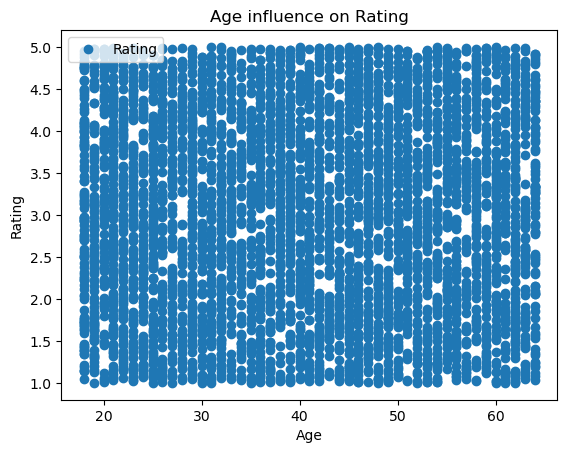

In [45]:
# Scatter plot with sample set is created
sample.plot(x = 'Age', y= 'Rating' ,style='o') 
plt.title('Age influence on Rating')  
plt.xlabel('Age')  
plt.ylabel('Rating')  
plt.show()

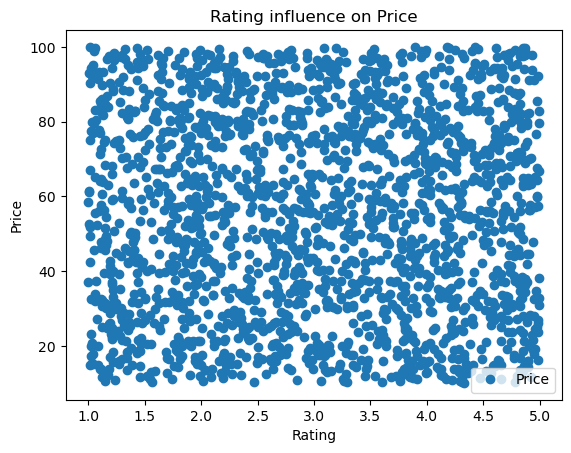

In [48]:
# Scatter plot is created
sample.plot(x = 'Rating', y= 'Price' ,style='o') 
plt.title('Rating influence on Price')  
plt.xlabel('Rating')  
plt.ylabel('Price')  
plt.show()

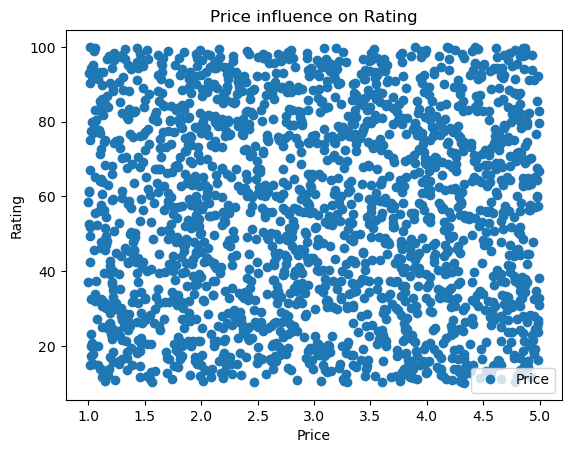

In [49]:
# Scatter plot is created
sample.plot(x = 'Rating', y= 'Price' ,style='o') 
plt.title('Price influence on Rating')  
plt.xlabel('Price')  
plt.ylabel('Rating')  
plt.show()

# Prepare for Regression 

In [11]:
# variables for regression reshaped 
X = df['Rating'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

In [12]:
# linear regression object created
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
# regression to training set fitted
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
regression = LinearRegression()

In [16]:
y_predicted = regression.predict(X_test)


In [17]:
y_predicted

array([[54.9878795 ],
       [54.99773576],
       [54.99637575],
       ...,
       [55.00127756],
       [54.98103208],
       [54.98818498]])

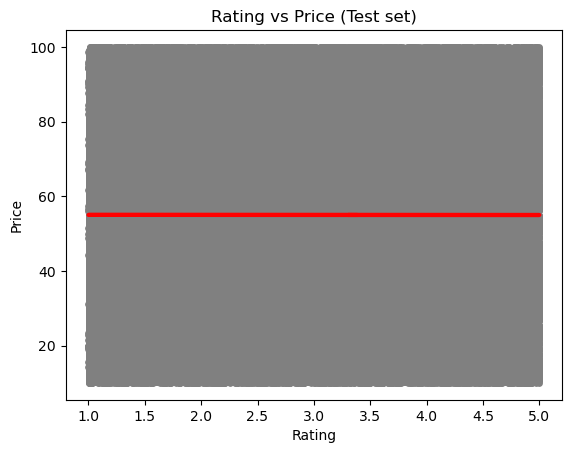

In [18]:
#  a plot that shows the regression line from the model on the test set is created.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Price (Test set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Price')
plot_test.show()

# Hypothesis

### Higher rating= higher price

In [19]:
# objects for model mean squared error and R2 score created
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [20]:

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00645005]]
Mean squared error:  674.9338496395242
R2 score:  -3.4552573902058015e-06


### It indicates a poor fit

In [21]:
# the model summary statistics printed

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,58.775360,54.987880
1,19.242085,54.997736
2,28.768218,54.996376
3,19.046581,54.988365
4,35.673406,54.988723
5,29.715524,54.983803
6,65.258343,54.977868
7,64.720735,54.993434
8,70.013283,54.991356
9,62.646279,54.996940


### There is a big difference so it is not good for predicting this specific result

# Create a Subset for Better Model

In [5]:
# the subset is created
subset = df[(df['Price'] >= 50.00) & (df['Price'] <= 100.00) & (df['Rating'] <= 5.00)]
subset.head()

,Unnamed: 0,Product Name,Price,Brand,Category,Rating,Review Count,Style Attributes,Total Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,0,T5D3,97.509966,Ralph Lauren,Footwear,1.421706,492,Streetwear,"M, L, XL",Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,1,Y0V7,52.341277,Ted Baker,Tops,1.037677,57,Vintage,"M, L, XL",Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
3,3,V2T6,81.116542,Alexander McQueen,Outerwear,2.844659,473,Formal,"S, M, L",Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
6,6,W9E4,70.494857,Ralph Lauren,Bottoms,3.730881,356,Edgy,"S, L, XL",Black,Very Low,54,Glamour,Kendall Jenner,Winter,Daytime,Positive,Other,Negative
7,7,T4D0,83.215427,Calvin Klein,Outerwear,1.455746,487,Edgy,"S, L, XL",Green,Average,27,W,Aimee Song,Summer,Nighttime,Mixed,Mixed,Neutral


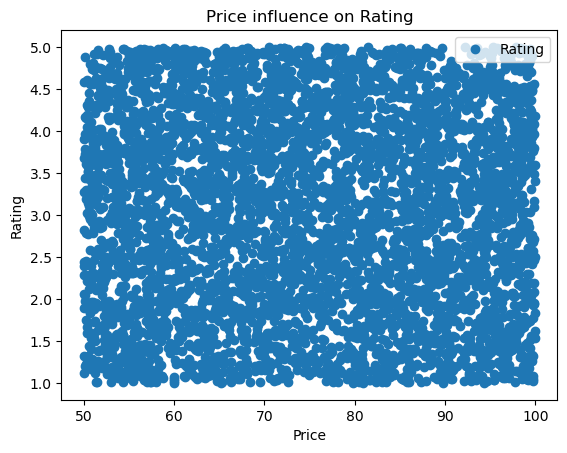

In [10]:
# scatterplot is created
sub_sample = subset.sample(n=5000)

sub_sample.plot(x = 'Price', y= 'Rating' ,style='o') 
plt.title('Price influence on Rating')  
plt.xlabel('Price')  
plt.ylabel('Rating')  
plt.show()

In [11]:
# variables for regression reshaped
Xs = sub_sample['Price'].values.reshape(-1, 1)
ys = sub_sample['Rating'].values.reshape(-1, 1)

In [12]:
# linear regression object created
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [13]:
sub_regression = LinearRegression()

In [14]:
# regression to training set fitted
sub_regression.fit(Xs_train, ys_train)

LinearRegression()

In [15]:
ys_predicted = sub_regression.predict(Xs_test)

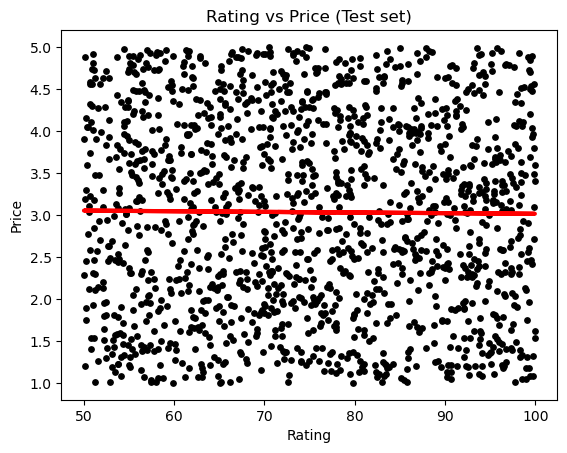

In [20]:
sub_plot_test = plt
sub_plot_test.scatter(Xs_test, ys_test, color='black', s = 15)
sub_plot_test.plot(Xs_test, ys_predicted, color='red', linewidth =3)
sub_plot_test.title('Rating vs Price (Test set)')
sub_plot_test.xlabel('Rating')
sub_plot_test.ylabel('Price')
sub_plot_test.show()

In [21]:
# objects for model mean squared error and R2 score created
sub_rmse = mean_squared_error(ys_test, ys_predicted)
sub_r2 = r2_score(ys_test, ys_predicted)

In [29]:
# the model summary statistics are created
print('Slope:' ,sub_regression.coef_)
print('Mean squared error: ', sub_rmse)
print('R2 score: ', sub_r2)

Slope: [[-0.00076027]]
Mean squared error:  1.337040179746302
R2 score:  0.00024712654958758407


In [28]:
## a dataframe comparing the actual and predicted values of y created

data = pd.DataFrame({'Actual': ys_test.flatten(), 'Predicted': ys_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.274086,3.030617
1,2.275278,3.040377
2,2.525880,3.021867
3,2.424652,3.048377
4,1.889554,3.040502
5,4.940294,3.045534
6,2.132863,3.030974
7,3.827835,3.048849
8,3.178643,3.017773
9,2.887195,3.035466


## It indicates a good fit for the model

# Export Data Set

In [30]:
# Set is exported
df.to_pickle(os.path.join(path,'df1.pkl'))